## McDonalds and Starbucks: what would be better as meals for teens?

In [1]:
# required imports
import pandas as pd
import matplotlib
%matplotlib inline

### McD, SB menus

In [2]:
# Starbucks (SB) and McDonalds (McD) combined menu in single df: 
menu_df = pd.read_csv ('combined.csv', sep=';', encoding = 'koi8-r')
menu_df.head()

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
0,SB,food,Bakery,Chonga Bagel,300,5.0,50,3.0,12,0.53
1,SB,food,Bakery,8-Grain Roll,380,6.0,70,7.0,10,0.43
2,SB,food,Bakery,Almond Croissant,410,22.0,45,3.0,10,0.39
3,SB,food,Bakery,Banana Nut Bread,420,22.0,52,2.0,6,0.32
4,SB,food,Bakery,Birthday Cake Pop,170,9.0,23,0.0,1,0.11


In [3]:
# checking data gaps - it's OK
menu_df.describe()

,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,302.72000,11.961000,38.740000,1.841000,10.776000,0.389510
std,212.84974,12.144338,25.376215,2.325087,10.325457,0.495669
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.00000,1.500000,21.750000,0.000000,2.000000,0.058750
50%,270.00000,9.000000,36.000000,1.000000,9.000000,0.162500
75%,430.00000,19.000000,52.000000,3.000000,16.000000,0.590000
max,1880.00000,118.000000,141.000000,24.000000,87.000000,3.600000


### Official norms

In [4]:
# Dict with actual norms (from official document-1)
norms = {}

f = open ('actual_norms.txt')

for line in f:
    line = line.strip().split(',')
    norms[line[0]] = line[1]
    
del norms['Item']
norms

{'Energy(kcal)': '2900',
 'Fat(g)': '97',
 'Carbohydrates(g)': '421',
 'Fiber(g)': '20',
 'Protein(g)': '87',
 'Sodium(g)': '1.3'}

In [5]:
# (From official document-2): 
# -breakfast + dinner = 20-25% + 30-35% daily energy value respectively --> 
# 25% and 35% (max due to sports competitions)
# -breakfast + dinner = 55-60% total daily nutrients value --> 
# 25% and 35% (max due to sports competitions)
# (only breakfast and dinner mentioned in the task)
# Let's assume that breakfast / dinner share are equal --> 
# meal_norm (30% and 30% respectively)

# calculating weighted norms:

meal_norm = {}

for key, value in norms.items():
    meal_norm[key] = float(value)*0.3
    
# sum_norm dict for data filtering (del items which contain greater values):   
sum_norm = {key:float(value)*0.6 for key, value in norms.items()}
    
print (meal_norm)
print (sum_norm)

{'Energy(kcal)': 870.0, 'Fat(g)': 29.099999999999998, 'Carbohydrates(g)': 126.3, 'Fiber(g)': 6.0, 'Protein(g)': 26.099999999999998, 'Sodium(g)': 0.39}
{'Energy(kcal)': 1740.0, 'Fat(g)': 58.199999999999996, 'Carbohydrates(g)': 252.6, 'Fiber(g)': 12.0, 'Protein(g)': 52.199999999999996, 'Sodium(g)': 0.78}


### Clean the data

In [6]:
# any all-zero items to delete?
del_list = []
def find_zeroes (row):
    
    '''the function recieve row of a df and process it: if all quantitative fields 
    are zeroes in the row, the row included in list for deleting'''
    
    if row[4:].sum() == 0:
#         print (row)
        del_list.append (row[3])
        
menu_df.apply (find_zeroes, axis = 1)
menu_df = menu_df.loc[~menu_df['Item'].isin(del_list)]
len (menu_df) # 7 values deleted

493

In [7]:
# filtering: del items which contain values greater than weighted norm in sum_norm dict:

menu_df[menu_df['Energy(kcal)']>=sum_norm['Energy(kcal)']]
# only 1 item exceeds sum_norms (1740 kcal)

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
322,McD,food,Burgers,Chicken McNuggets (40 piece),1880,118.0,118,6.0,87,3.6


In [8]:
menu_df[menu_df['Fat(g)']>=sum_norm['Fat(g)']]
# 3 items exceed sum_norms (58.2 g)

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
272,McD,food,Hot Big Breakfast,BB with Hotcakes (Large Biscuit),1150,60.0,116,7.0,36,2.26
321,McD,food,Burgers,Chicken McNuggets (20 piece),940,59.0,59,3.0,44,1.80
322,McD,food,Burgers,Chicken McNuggets (40 piece),1880,118.0,118,6.0,87,3.60


In [9]:
menu_df[menu_df['Carbohydrates(g)']>=sum_norm['Carbohydrates(g)']]
# no items exceed sum_norms

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)


In [10]:
menu_df[menu_df['Fiber(g)']>=sum_norm['Fiber(g)']]
# 2 items exceed sum_norms (12.0 g)

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
56,SB,food,Protein Boxes & Bowls,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21.0,23,0.67
114,SB,food,Fruit & Nuts,Bare Fruit Medley,130,0.0,31,24.0,1,0.00


In [11]:
menu_df[menu_df['Protein(g)']>=sum_norm['Protein(g)']]
# only 1 item exceeds sum_norms (52.2 g)

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
322,McD,food,Burgers,Chicken McNuggets (40 piece),1880,118.0,118,6.0,87,3.6


In [12]:
menu_df[menu_df['Sodium(g)']>=sum_norm['Sodium(g)']]
# Wow! 104 items exceed sum_norms (0.78 g)

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
36,SB,food,Cold Sandwiches,Chicken & Fig Spread,460,13.0,61,5.0,24,0.94
37,SB,food,Cold Sandwiches,Chipotle Chicken Wrap,470,19.0,55,4.0,22,1.05
38,SB,food,Protein Boxes & Bowls,Farmers' Market Protein Box,470,29.0,29,4.0,21,0.88
40,SB,food,Warm Sandwiches,Grilled Chicken & Cauliflower Tabbouleh,390,27.0,15,4.0,21,1.14
41,SB,food,Warm Sandwiches,Honey BBQ Sriracha Chicken Sandwich,360,7.0,52,3.0,22,1.09
43,SB,food,Cold Sandwiches,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47,6.0,32,0.86
44,SB,food,Warm Sandwiches,Seasoned Turkey & Green Pepper Pico,390,18.0,30,5.0,28,0.90
45,SB,food,Warm Sandwiches,Smoked Mozzarella & Roasted Pepper Sandwich,500,28.0,46,4.0,18,1.19
46,SB,food,Warm Sandwiches,Smoked Pork Cubano,450,25.0,66,5.0,21,1.20
48,SB,food,Warm Sandwiches,Turkey Pastrami Reuben,500,21.0,50,4.0,26,1.13


In [13]:
# Well, lets assume that sodium needs increases due to sport activity: 
# 1.0 g sodium threshold: nevertheless 73 items exceed 1.0 g
menu_df[menu_df['Sodium(g)']>=1]

,McD/SB,Category,Kind,Item,Energy(kcal),Fat(g),Carbohydrates(g),Fiber(g),Protein(g),Sodium(g)
37,SB,food,Cold Sandwiches,Chipotle Chicken Wrap,470,19.0,55,4.0,22,1.05
40,SB,food,Warm Sandwiches,Grilled Chicken & Cauliflower Tabbouleh,390,27.0,15,4.0,21,1.14
41,SB,food,Warm Sandwiches,Honey BBQ Sriracha Chicken Sandwich,360,7.0,52,3.0,22,1.09
45,SB,food,Warm Sandwiches,Smoked Mozzarella & Roasted Pepper Sandwich,500,28.0,46,4.0,18,1.19
46,SB,food,Warm Sandwiches,Smoked Pork Cubano,450,25.0,66,5.0,21,1.20
48,SB,food,Warm Sandwiches,Turkey Pastrami Reuben,500,21.0,50,4.0,26,1.13
51,SB,food,Protein Boxes & Bowls,Chicken & Quinoa Protein Bowl with Black Beans...,420,17.0,42,9.0,27,1.03
52,SB,food,Protein Boxes & Bowls,Chicken BLT Protein Box,580,23.0,58,7.0,35,1.66
53,SB,food,Protein Boxes & Bowls,Chicken Wrap Protein Box,460,22.0,45,4.0,20,1.00
58,SB,food,Protein Boxes & Bowls,Smoked Turkey Protein Box,360,12.0,42,5.0,24,1.62


In [14]:
# Drop out all items that exceeds the criteria:
menu_df = menu_df[menu_df['Energy(kcal)'] < sum_norm['Energy(kcal)']]
menu_df = menu_df[menu_df['Fat(g)'] < sum_norm['Fat(g)']]
menu_df = menu_df[menu_df['Fiber(g)'] < sum_norm['Fiber(g)']]
menu_df = menu_df[menu_df['Protein(g)'] < sum_norm['Protein(g)']]
menu_df = menu_df[menu_df['Sodium(g)'] < 1.0]

len (menu_df)

418

In [15]:
# We increased sodium sum norm 0.78 --> 1.0, i.e. +0.22. 
# In turns it increases sodium meal_norm by 0.11 g. Dicts should be updated: 
meal_norm['Sodium(g)'] += 0.11
sum_norm['Sodium(g)'] += 0.22
print (meal_norm)
print (sum_norm)

{'Energy(kcal)': 870.0, 'Fat(g)': 29.099999999999998, 'Carbohydrates(g)': 126.3, 'Fiber(g)': 6.0, 'Protein(g)': 26.099999999999998, 'Sodium(g)': 0.5}
{'Energy(kcal)': 1740.0, 'Fat(g)': 58.199999999999996, 'Carbohydrates(g)': 252.6, 'Fiber(g)': 12.0, 'Protein(g)': 52.199999999999996, 'Sodium(g)': 1.0}


In [16]:
# writing processed dataset in csv
menu_df.to_csv ('combined_processed.csv', index=False)

### Visualizations & descriptive stats

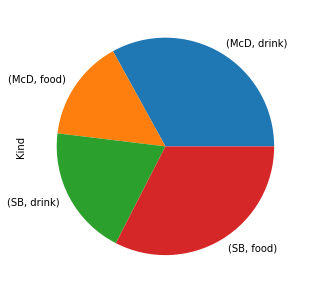

In [17]:
# total food and drinks for each restaurant
menu_df.groupby (['McD/SB','Category']).count()['Kind'].plot.pie(subplots=False, figsize=(5, 5))

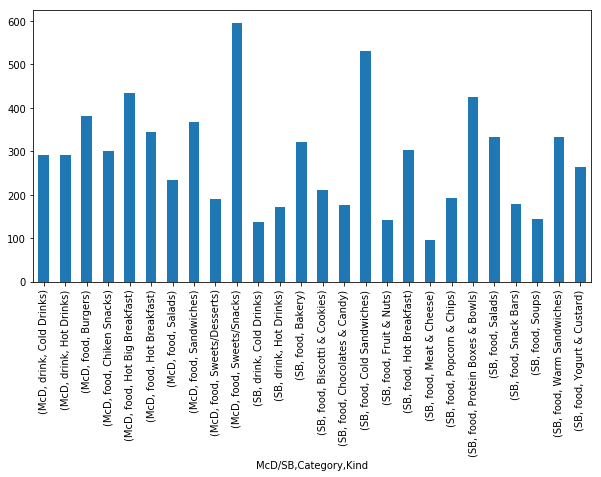

In [18]:
# All mean caloric values:
means_all = menu_df.groupby (['McD/SB', 'Category', 'Kind']).mean()
means_all['Energy(kcal)'].plot(kind = 'bar', subplots = False, sharex=True, sharey=False, width = 0.5, figsize = (10,5))

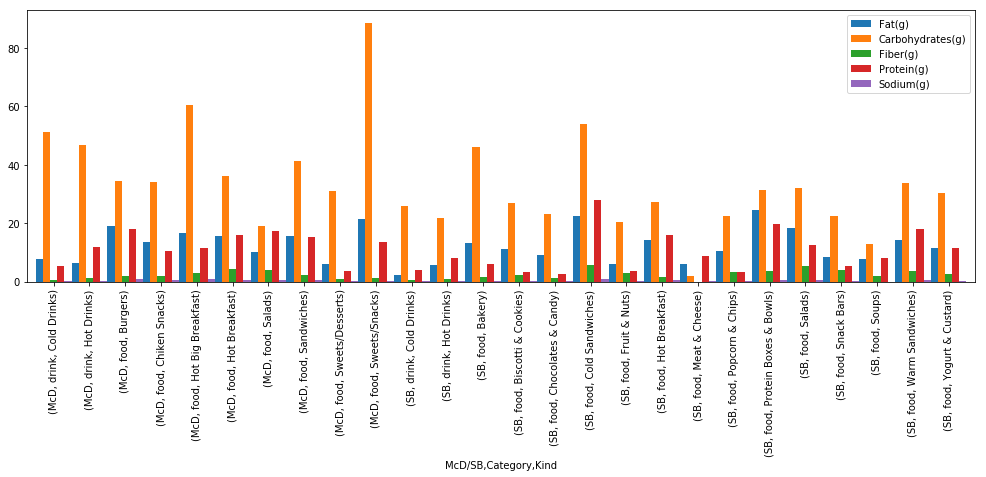

In [19]:
# All mean nutrition values:
means_all[['Fat(g)', 
          'Carbohydrates(g)', 
          'Fiber(g)', 
          'Protein(g)', 
          'Sodium(g)']].plot(kind = 'bar', subplots = False, sharex=True, sharey=False, width = 1, figsize = (17,5))

In [20]:
# full desc stats
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(menu_df.groupby (['McD/SB', 'Category']).describe())


Energy(kcal)                                              \
                       count        mean         std   min    25%    50%   
McD/SB Category                                                            
McD    drink           138.0  290.942029  193.314870   0.0  170.0  260.0   
       food             63.0  347.936508  170.165088  15.0  250.0  340.0   
SB     drink            81.0  145.493827   99.992515   5.0   70.0  130.0   
       food            136.0  252.058824  129.380963  60.0  150.0  230.0   

                              Fat(g)                                       \
                   75%    max  count       mean       std  min  25%   50%   
McD/SB Category                                                             
McD    drink     370.0  850.0  138.0   7.173913  7.947972  0.0  0.0   4.5   
       food      430.0  930.0   63.0  14.777778  8.286589  0.0  8.0  15.0   
SB     drink     200.0  430.0   81.0   3.123457  4.432501  0.0  0.0   0.5   
       food      332.5  600.0  136.0  11.841912  8.026969  0.0  6.0  11.5   

                            Carbohydrates(g)                             \
                  75%   max            count       mean        std  min   
McD/SB Category                                                           
McD    drink     13.0  31.0            138.0  49.500000  30.551918  0.0   
       food      22.0  33.0             63.0  40.730159  25.598139  4.0   
SB     drink      6.0  26.0             81.0  24.851852  15.487988  0.0   
       food      18.0  32.0            136.0  29.919118  17.019403  0.0   

                                          Fiber(g)                           \
                   25%   50%   75%    max    count      mean       std  min   
McD/SB Category                                                               
McD    drink     28.25  48.5  65.0  141.0    138.0  0.768116  0.906504  0.0   
       food      27.50  34.0  51.0  139.0     63.0  2.285714  1.640501  0.0   
SB     drink     14.00  23.0  35.0   64.0     81.0  0.604938  1.715219  0.0   
       food      18.00  27.0  42.0   71.0    136.0  2.444853  2.128008  0.0   

                                     Protein(g)                            \
                 25%  50%  75%   max      count       mean       std  min   
McD/SB Category                                                             
McD    drink     0.0  1.0  1.0   5.0      138.0   7.782609  5.958174  0.0   
       food      1.0  2.0  3.0   7.0       63.0  13.317460  8.220402  0.0   
SB     drink     0.0  0.0  0.0   8.0       81.0   4.901235  5.750228  0.0   
       food      1.0  2.0  3.0  11.0      136.0   7.779412  7.013945  0.0   

                                       Sodium(g)                           \
                 25%   50%   75%   max     count      mean       std  min   
McD/SB Category                                                             
McD    drink     1.0   9.0  12.0  19.0     138.0  0.125036  0.082673  0.0   
       food      6.0  14.0  21.0  29.0      63.0  0.513175  0.330011  0.0   
SB     drink     0.0   2.0  10.0  20.0      81.0  0.071111  0.075519  0.0   
       food      3.0   5.0  11.0  32.0     136.0  0.277022  0.267558  0.0   

                                             
                   25%    50%     75%   max  
McD/SB Category                              
McD    drink     0.050  0.135  0.1800  0.38  
       food      0.175  0.590  0.8050  0.99  
SB     drink     0.010  0.030  0.1350  0.33  
       food      0.065  0.180  0.4425  0.95

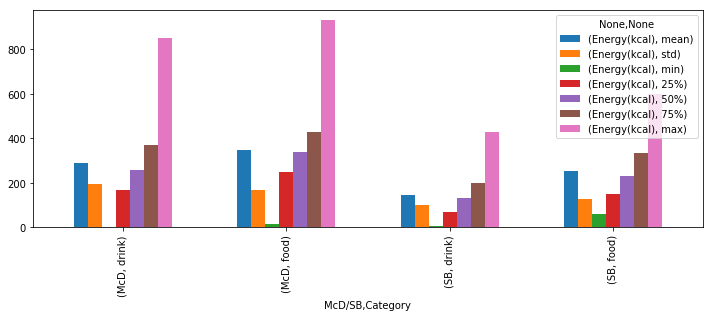

In [21]:
stats = menu_df.groupby (['McD/SB', 'Category']).describe()
# CALORIES: mean, std, min, 25%, 50%, 75%, max
stats.iloc[:,1:8].plot (kind='bar', subplots=False, legend=True, figsize=(12,4), width = 0.6)

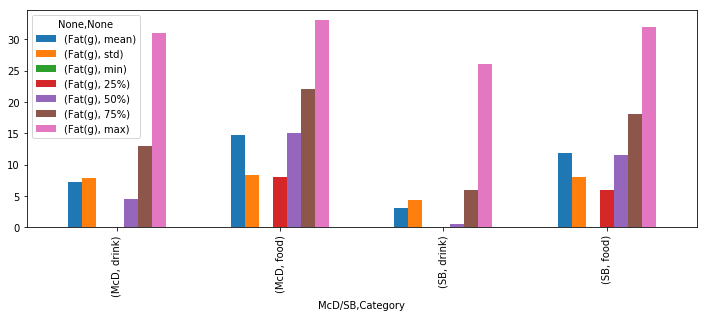

In [22]:
# FAT: mean, std, min, 25%, 50%, 75%, max
stats.iloc[:,9:16].plot (kind='bar', subplots=False, legend=True, figsize=(12,4), width = 0.6)

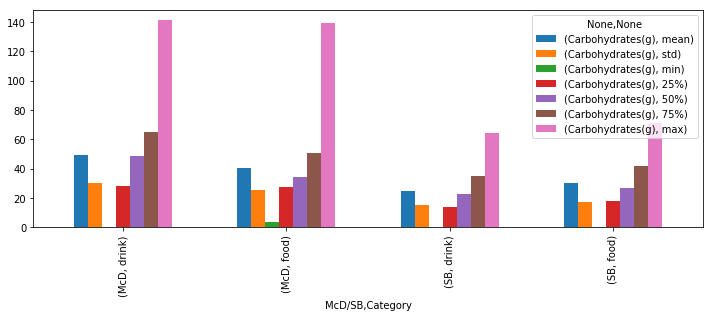

In [23]:
# CARBOHYDRATES: mean, std, min, 25%, 50%, 75%, max
stats.iloc[:,17:24].plot (kind='bar', subplots=False, legend=True, figsize=(12,4), width = 0.6)

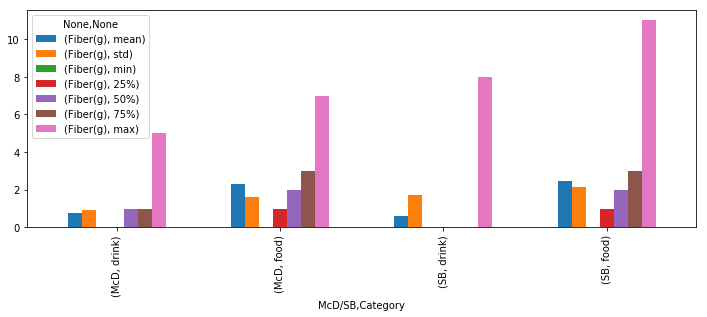

In [24]:
# FIBER: mean, std, min, 25%, 50%, 75%, max
stats.iloc[0:,25:32].plot (kind='bar', subplots=False, legend=True, figsize=(12,4), width = 0.6)

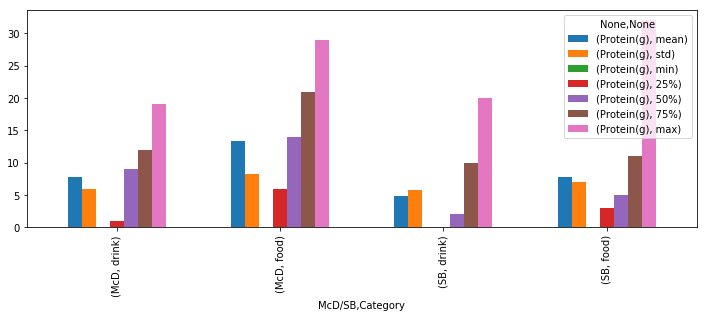

In [25]:
# PROTEIN: mean, std, min, 25%, 50%, 75%, max
stats.iloc[0:,33:40].plot (kind='bar', subplots=False, legend=True, figsize=(12,4), width = 0.6)

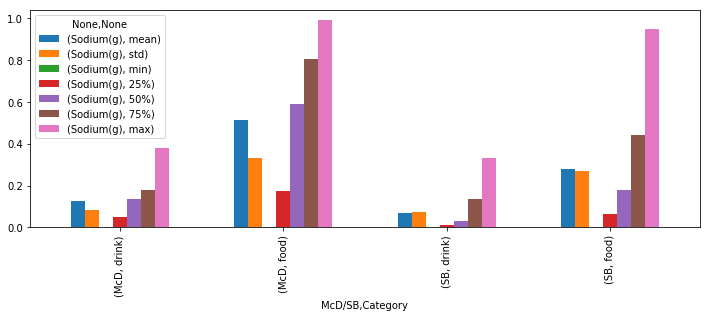

In [26]:
# SODIUM: mean, std, min, 25%, 50%, 75%, max
stats.iloc[0:,41:48].plot (kind='bar', subplots=False, legend=True, figsize=(12,4), width = 0.6)

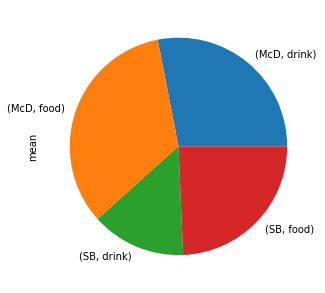

In [27]:
# CALORIES means share for four groups
stats['Energy(kcal)']['mean'].plot.pie(y ='Energy(kcal)', subplots=False, figsize=(5, 5), legend=False)

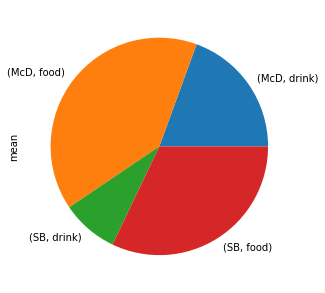

In [28]:
# FAT means shares for four groups
stats['Fat(g)']['mean'].plot.pie(y='Fat(g)', subplots=False, figsize=(5, 5), legend=False)

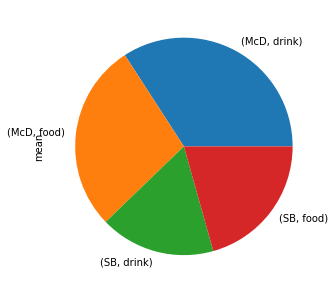

In [29]:
# CARBOHYDRATES means shares for four groups
stats['Carbohydrates(g)']['mean'].plot.pie(y='Carbohydrates(g)', subplots=False, figsize=(5, 5),legend=False)

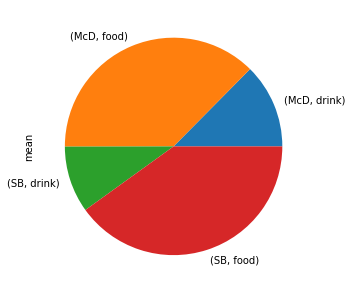

In [30]:
# FIBER means shares for four groups
stats['Fiber(g)']['mean'].plot.pie(y='Fiber(g)', subplots=False, figsize=(5, 5),legend=False)

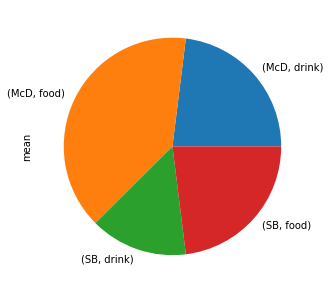

In [31]:
# PROTEIN means shares for four groups
stats['Protein(g)']['mean'].plot.pie(y='Protein(g)', subplots=False, figsize=(5, 5),legend=False)

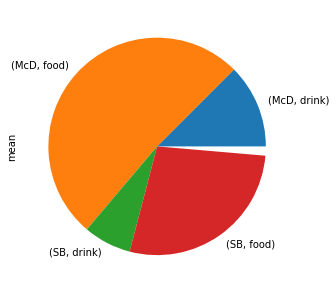

In [32]:
# SODIUM means shares for four groups
stats['Sodium(g)']['mean'].plot.pie(y='Sodium(g)', subplots=False, figsize=(5, 5),legend=False)